# 📊 ACOSUS User Feedback Survey Analysis

This notebook analyzes user feedback data from the **ACOSUS** (AI Counseling System for Transfer Students) system using the Technology Acceptance Model (TAM) framework and additional evaluation metrics.

**Author:** Deep Mandloi  
**Co-authors:** Dr. Shiwe Wang, Dr. Lizi Zhu  
**Last Updated:** December 2025

---

## Survey Structure
| Questions | Construct |
|-----------|----------|
| Q1_1 - Q1_6 | Perceived Usefulness (TAM) |
| Q2_1 - Q2_6 | Perceived Ease of Use (TAM) |
| Q3_1 - Q3_3 | System Interface Assessment |
| Q7 | System Accuracy |
| Q8 | Probability Alignment |
| Q9 | Recommendation Relevance |
| Q10 | Actionability |
| Q13_1 - Q13_2 | Behavioral Intention |

---
# ⚙️ CONFIGURATION

**👇 UPDATE THESE SETTINGS BEFORE RUNNING 👇**

In [1]:
# ╔══════════════════════════════════════════════════════════════════╗
# ║                    CONFIGURATION SETTINGS                        ║
# ╠══════════════════════════════════════════════════════════════════╣
# ║  Update these variables before running the notebook              ║
# ╚══════════════════════════════════════════════════════════════════╝

# ----------------------------------------------------------------------
# OPTION 1: Upload file manually (recommended for Colab)
# Set this to True to upload a file when you run the notebook
# ----------------------------------------------------------------------
UPLOAD_FILE = True

# ----------------------------------------------------------------------
# OPTION 2: Use Google Drive
# Set UPLOAD_FILE = False and specify the path in Google Drive
# ----------------------------------------------------------------------
USE_GOOGLE_DRIVE = False
GOOGLE_DRIVE_PATH = '/content/drive/MyDrive/ACOSUS/survey_data.csv'

# ----------------------------------------------------------------------
# OPTION 3: Direct file path (for local Jupyter)
# Set both UPLOAD_FILE = False and USE_GOOGLE_DRIVE = False
# ----------------------------------------------------------------------
LOCAL_FILE_PATH = 'ACOSUS_User_Feedback_Survey.csv'

# ----------------------------------------------------------------------
# Output settings
# ----------------------------------------------------------------------
SAVE_FIGURES = True  # Set to True to save figures as PNG files
OUTPUT_DIR = './figures/'  # Directory to save figures

print("✅ Configuration loaded!")
print(f"   - Upload file: {UPLOAD_FILE}")
print(f"   - Use Google Drive: {USE_GOOGLE_DRIVE}")
print(f"   - Save figures: {SAVE_FIGURES}")

✅ Configuration loaded!
   - Upload file: True
   - Use Google Drive: False
   - Save figures: True


---
# 1. Setup and Installation

In [2]:
# Install required packages (uncomment if needed)
# !pip install pandas matplotlib seaborn numpy -q

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec
import warnings
import os

warnings.filterwarnings('ignore')

# Enable inline plotting for Colab/Jupyter
%matplotlib inline

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [4]:
# Publication-quality plot styling
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['DejaVu Sans', 'Arial', 'Helvetica'],
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'axes.spines.top': False,
    'axes.spines.right': False,
})

# Color palette for academic papers
COLORS = {
    'primary': '#2E4057',
    'secondary': '#048A81',
    'accent': '#54C6EB',
    'neutral': '#8D8D8D',
    'positive': '#2E7D32',
    'highlight': '#FF6B35'
}

# Create output directory if saving figures
if SAVE_FIGURES:
    os.makedirs(OUTPUT_DIR, exist_ok=True)

print("✅ Plot styling configured!")

✅ Plot styling configured!


---
# 2. Load Data

In [5]:
# Determine data source based on configuration
data_file = None

if UPLOAD_FILE:
    # Option 1: Upload file (Google Colab)
    try:
        from google.colab import files
        print("📁 Please upload your Qualtrics CSV file:")
        uploaded = files.upload()
        data_file = list(uploaded.keys())[0]
        print(f"✅ Uploaded: {data_file}")
    except ImportError:
        # Not in Colab, fall back to local path
        print("⚠️ Not running in Colab. Using local file path.")
        data_file = LOCAL_FILE_PATH

elif USE_GOOGLE_DRIVE:
    # Option 2: Google Drive
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        data_file = GOOGLE_DRIVE_PATH
        print(f"✅ Using Google Drive: {data_file}")
    except ImportError:
        print("⚠️ Not running in Colab. Using local file path.")
        data_file = LOCAL_FILE_PATH

else:
    # Option 3: Local file path
    data_file = LOCAL_FILE_PATH
    print(f"📁 Using local file: {data_file}")

📁 Please upload your Qualtrics CSV file:


Saving Label_ACOSUS User Feedback Survey_December 20, 2025_12.59.csv to Label_ACOSUS User Feedback Survey_December 20, 2025_12.59.csv
✅ Uploaded: Label_ACOSUS User Feedback Survey_December 20, 2025_12.59.csv


In [6]:
# Load data (skip Qualtrics metadata rows)
df = pd.read_csv(data_file, skiprows=[1, 2])

print("═" * 50)
print("📊 DATA LOADED SUCCESSFULLY")
print("═" * 50)
print(f"   Total responses: {len(df)}")
print(f"   Total columns: {len(df.columns)}")
print("═" * 50)

══════════════════════════════════════════════════
📊 DATA LOADED SUCCESSFULLY
══════════════════════════════════════════════════
   Total responses: 4
   Total columns: 51
══════════════════════════════════════════════════


In [7]:
# Preview available columns
print("📋 Available columns:")
print("-" * 50)
for i, col in enumerate(df.columns):
    print(f"  {i+1:2d}. {col}")

📋 Available columns:
--------------------------------------------------
   1. StartDate
   2. EndDate
   3. Status
   4. IPAddress
   5. Progress
   6. Duration (in seconds)
   7. Finished
   8. RecordedDate
   9. ResponseId
  10. RecipientLastName
  11. RecipientFirstName
  12. RecipientEmail
  13. ExternalReference
  14. LocationLatitude
  15. LocationLongitude
  16. DistributionChannel
  17. UserLanguage
  18. Q1_1
  19. Q1_2
  20. Q1_3
  21. Q1_4
  22. Q1_5
  23. Q1_6
  24. Q2_1
  25. Q2_2
  26. Q2_3
  27. Q2_4
  28. Q2_5
  29. Q2_6
  30. Q3_1
  31. Q3_2
  32. Q3_3
  33. Q4
  34. Q5
  35. Q6
  36. Q7
  37. Q8
  38. Q9
  39. Q10
  40. Q11
  41. Q12
  42. Q13_1
  43. Q13_2
  44. Q14
  45. Q14_7_TEXT
  46. Q15
  47. Q16
  48. Q17
  49. Q18
  50. Q19
  51. Q20


In [8]:
# Preview key survey responses
key_cols = ['Q1_1', 'Q1_2', 'Q1_3', 'Q2_1', 'Q2_2', 'Q7', 'Q8', 'Q9', 'Q10', 'Q13_1', 'Q13_2']
available_cols = [col for col in key_cols if col in df.columns]
print("📋 Preview of key responses:")
df[available_cols]

📋 Preview of key responses:


,Q1_1,Q1_2,Q1_3,Q2_1,Q2_2,Q7,Q8,Q9,Q10,Q13_1,Q13_2
0,Strongly agree,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Very accurate,Very aligned,Very relevant,Easily actionable,5,5
1,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Extremely accurate,Perfectly aligned,Extremely relevant,Easily actionable,5,5
2,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Extremely accurate,Perfectly aligned,Extremely relevant,Easily actionable,5,5
3,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Strongly agree,Very accurate,Very aligned,Moderately relevant,Moderately actionable,4,2


---
# 3. Define Response Mappings

In [9]:
# Likert scale mapping (for TAM questions)
LIKERT_MAP = {
    'Strongly disagree': 1,
    'Somewhat disagree': 2,
    'Neither agree nor disagree': 3,
    'Somewhat agree': 4,
    'Strongly agree': 5
}

# Accuracy scale mapping (Q7)
ACCURACY_MAP = {
    'Not at all accurate': 1,
    'Slightly accurate': 2,
    'Moderately accurate': 3,
    'Very accurate': 4,
    'Extremely accurate': 5
}

# Alignment scale mapping (Q8)
ALIGNMENT_MAP = {
    'Not at all aligned': 1,
    'Slightly aligned': 2,
    'Somewhat aligned': 3,
    'Very aligned': 4,
    'Perfectly aligned': 5
}

# Relevance scale mapping (Q9)
RELEVANCE_MAP = {
    'Not at all relevant': 1,
    'Slightly relevant': 2,
    'Moderately relevant': 3,
    'Very relevant': 4,
    'Extremely relevant': 5
}

# Actionability scale mapping (Q10)
ACTIONABILITY_MAP = {
    'Not actionable': 1,
    'Somewhat difficult to implement': 2,
    'Moderately actionable': 3,
    'Reasonably actionable': 4,
    'Easily actionable': 5
}

print("✅ Response mappings defined!")

✅ Response mappings defined!


In [10]:
# Define question labels for visualization

# TAM Perceived Usefulness questions (Q1_1 to Q1_6)
PU_LABELS = [
    'Task Efficiency',
    'Planning Performance',
    'Productivity',
    'Transfer Effectiveness',
    'Easier Planning',
    'Overall Usefulness'
]

# TAM Perceived Ease of Use questions (Q2_1 to Q2_6)
PEOU_LABELS = [
    'Easy to Learn',
    'Easy to Control',
    'Clear Interaction',
    'Flexible',
    'Easy to Master',
    'Overall Easy to Use'
]

# System Interface questions (Q3_1 to Q3_3)
INTERFACE_LABELS = [
    'Understood Needs',
    'Straightforward Input',
    'Intuitive Navigation'
]

# Column groupings
PU_COLS = ['Q1_1', 'Q1_2', 'Q1_3', 'Q1_4', 'Q1_5', 'Q1_6']
PEOU_COLS = ['Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6']
INTERFACE_COLS = ['Q3_1', 'Q3_2', 'Q3_3']

print("✅ Question labels defined!")

✅ Question labels defined!


---
# 4. Data Transformation

In [11]:
# Convert Likert responses to numeric for TAM and Interface questions
for col in PU_COLS + PEOU_COLS + INTERFACE_COLS:
    if col in df.columns:
        df[col + '_num'] = df[col].map(LIKERT_MAP)

# Convert other scales
if 'Q7' in df.columns:
    df['Q7_num'] = df['Q7'].map(ACCURACY_MAP)
if 'Q8' in df.columns:
    df['Q8_num'] = df['Q8'].map(ALIGNMENT_MAP)
if 'Q9' in df.columns:
    df['Q9_num'] = df['Q9'].map(RELEVANCE_MAP)
if 'Q10' in df.columns:
    df['Q10_num'] = df['Q10'].map(ACTIONABILITY_MAP)

# Behavioral intention (already numeric 1-5)
if 'Q13_1' in df.columns:
    df['Q13_1_num'] = pd.to_numeric(df['Q13_1'], errors='coerce')
if 'Q13_2' in df.columns:
    df['Q13_2_num'] = pd.to_numeric(df['Q13_2'], errors='coerce')

print("✅ Data transformation complete!")

✅ Data transformation complete!


In [12]:
# Verify numeric conversion
numeric_cols = [col for col in df.columns if col.endswith('_num')]
print("📊 Numeric columns summary:")
df[numeric_cols].describe().round(2)

📊 Numeric columns summary:


,Q1_1_num,Q1_2_num,Q1_3_num,Q1_4_num,Q1_5_num,Q1_6_num,Q2_1_num,Q2_2_num,Q2_3_num,Q2_4_num,...,Q2_6_num,Q3_1_num,Q3_2_num,Q3_3_num,Q7_num,Q8_num,Q9_num,Q10_num,Q13_1_num,Q13_2_num
count,4.0,4.0,4.00,4.00,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.00,4.00,4.00,4.00,4.00,4.00,4.0,4.00,4.00
mean,5.0,4.5,4.25,4.00,4.5,4.5,5.0,5.0,5.0,5.0,...,5.0,4.75,4.75,4.75,4.50,4.50,4.25,4.5,4.75,4.25
std,0.0,1.0,0.96,1.15,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.50,0.50,0.50,0.58,0.58,0.96,1.0,0.50,1.50
min,5.0,3.0,3.00,3.00,3.0,3.0,5.0,5.0,5.0,5.0,...,5.0,4.00,4.00,4.00,4.00,4.00,3.00,3.0,4.00,2.00
25%,5.0,4.5,3.75,3.00,4.5,4.5,5.0,5.0,5.0,5.0,...,5.0,4.75,4.75,4.75,4.00,4.00,3.75,4.5,4.75,4.25
50%,5.0,5.0,4.50,4.00,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.00,5.00,5.00,4.50,4.50,4.50,5.0,5.00,5.00
75%,5.0,5.0,5.00,5.00,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00,5.00
max,5.0,5.0,5.00,5.00,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.00,5.00,5.00,5.00,5.00,5.00,5.0,5.00,5.00


---
# 5. Summary Statistics

In [13]:
def calculate_construct_stats(df, cols, labels):
    """Calculate mean, std, min, max for a set of columns."""
    stats = []
    for col, label in zip(cols, labels):
        num_col = col + '_num'
        if num_col in df.columns:
            stats.append({
                'Item': label,
                'Mean': df[num_col].mean(),
                'Std': df[num_col].std(),
                'Min': df[num_col].min(),
                'Max': df[num_col].max(),
                'N': df[num_col].notna().sum()
            })
    return pd.DataFrame(stats)

In [14]:
# Perceived Usefulness statistics
print("═" * 60)
print("📈 PERCEIVED USEFULNESS (PU) STATISTICS")
print("═" * 60)
pu_stats = calculate_construct_stats(df, PU_COLS, PU_LABELS)
display(pu_stats.round(2))
print(f"\n🎯 Overall PU Mean: {pu_stats['Mean'].mean():.2f}/5.00")

════════════════════════════════════════════════════════════
📈 PERCEIVED USEFULNESS (PU) STATISTICS
════════════════════════════════════════════════════════════


,Item,Mean,Std,Min,Max,N
0,Task Efficiency,5.00,0.00,5,5,4
1,Planning Performance,4.50,1.00,3,5,4
2,Productivity,4.25,0.96,3,5,4
3,Transfer Effectiveness,4.00,1.15,3,5,4
4,Easier Planning,4.50,1.00,3,5,4
5,Overall Usefulness,4.50,1.00,3,5,4



🎯 Overall PU Mean: 4.46/5.00


In [15]:
# Perceived Ease of Use statistics
print("═" * 60)
print("📈 PERCEIVED EASE OF USE (PEOU) STATISTICS")
print("═" * 60)
peou_stats = calculate_construct_stats(df, PEOU_COLS, PEOU_LABELS)
display(peou_stats.round(2))
print(f"\n🎯 Overall PEOU Mean: {peou_stats['Mean'].mean():.2f}/5.00")

════════════════════════════════════════════════════════════
📈 PERCEIVED EASE OF USE (PEOU) STATISTICS
════════════════════════════════════════════════════════════


,Item,Mean,Std,Min,Max,N
0,Easy to Learn,5.0,0.0,5,5,4
1,Easy to Control,5.0,0.0,5,5,4
2,Clear Interaction,5.0,0.0,5,5,4
3,Flexible,5.0,0.0,5,5,4
4,Easy to Master,5.0,0.0,5,5,4
5,Overall Easy to Use,5.0,0.0,5,5,4



🎯 Overall PEOU Mean: 5.00/5.00


In [16]:
# Interface Assessment statistics
print("═" * 60)
print("📈 INTERFACE ASSESSMENT STATISTICS")
print("═" * 60)
interface_stats = calculate_construct_stats(df, INTERFACE_COLS, INTERFACE_LABELS)
display(interface_stats.round(2))
print(f"\n🎯 Overall Interface Mean: {interface_stats['Mean'].mean():.2f}/5.00")

════════════════════════════════════════════════════════════
📈 INTERFACE ASSESSMENT STATISTICS
════════════════════════════════════════════════════════════


,Item,Mean,Std,Min,Max,N
0,Understood Needs,4.75,0.5,4,5,4
1,Straightforward Input,4.75,0.5,4,5,4
2,Intuitive Navigation,4.75,0.5,4,5,4



🎯 Overall Interface Mean: 4.75/5.00


In [17]:
# System Evaluation Metrics
print("═" * 60)
print("📈 SYSTEM EVALUATION METRICS")
print("═" * 60)

eval_data = {
    'Metric': ['System Accuracy', 'Probability Alignment', 'Recommendation Relevance', 'Actionability'],
    'Question': ['Q7', 'Q8', 'Q9', 'Q10'],
    'Mean': [df['Q7_num'].mean(), df['Q8_num'].mean(), df['Q9_num'].mean(), df['Q10_num'].mean()],
    'Std': [df['Q7_num'].std(), df['Q8_num'].std(), df['Q9_num'].std(), df['Q10_num'].std()],
    'N': [df['Q7_num'].notna().sum(), df['Q8_num'].notna().sum(),
          df['Q9_num'].notna().sum(), df['Q10_num'].notna().sum()]
}
eval_stats = pd.DataFrame(eval_data)
display(eval_stats.round(2))

════════════════════════════════════════════════════════════
📈 SYSTEM EVALUATION METRICS
════════════════════════════════════════════════════════════


,Metric,Question,Mean,Std,N
0,System Accuracy,Q7,4.50,0.58,4
1,Probability Alignment,Q8,4.50,0.58,4
2,Recommendation Relevance,Q9,4.25,0.96,4
3,Actionability,Q10,4.50,1.00,4


In [18]:
# Behavioral Intention
print("═" * 60)
print("📈 BEHAVIORAL INTENTION METRICS")
print("═" * 60)

intention_data = {
    'Metric': ['Likelihood to Continue', 'Likelihood to Recommend'],
    'Question': ['Q13_1', 'Q13_2'],
    'Mean': [df['Q13_1_num'].mean(), df['Q13_2_num'].mean()],
    'Std': [df['Q13_1_num'].std(), df['Q13_2_num'].std()],
    'N': [df['Q13_1_num'].notna().sum(), df['Q13_2_num'].notna().sum()]
}
intention_stats = pd.DataFrame(intention_data)
display(intention_stats.round(2))

════════════════════════════════════════════════════════════
📈 BEHAVIORAL INTENTION METRICS
════════════════════════════════════════════════════════════


,Metric,Question,Mean,Std,N
0,Likelihood to Continue,Q13_1,4.75,0.5,4
1,Likelihood to Recommend,Q13_2,4.25,1.5,4


---
# 6. Visualizations

## Figure 1: TAM Metrics (Perceived Usefulness & Ease of Use)

💾 Saved: ./figures/fig1_tam_metrics.png


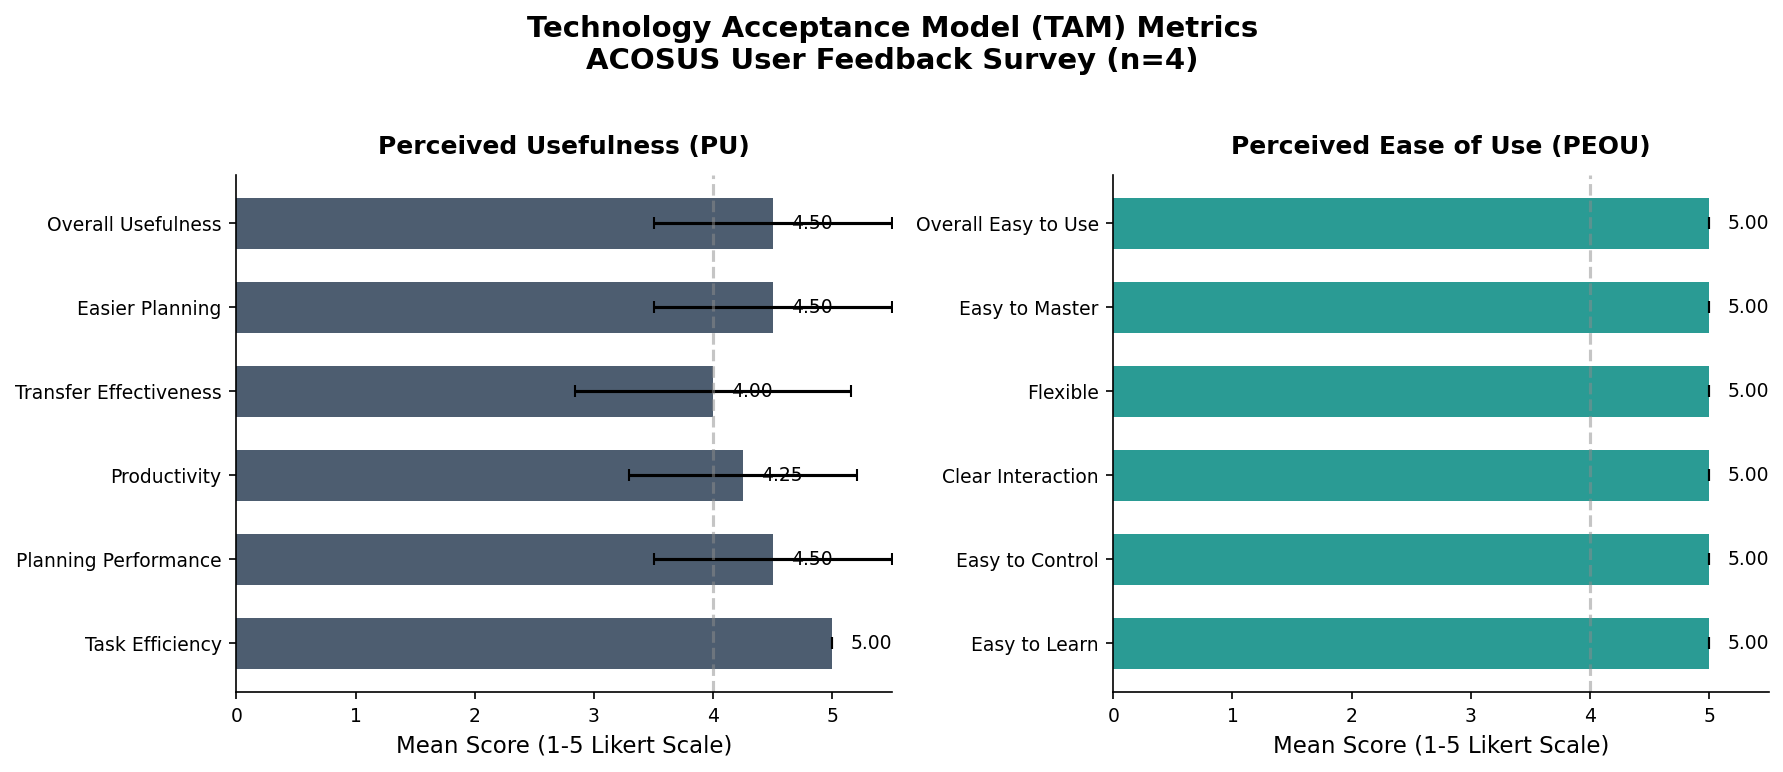

In [19]:
fig1, axes = plt.subplots(1, 2, figsize=(12, 5))

# Perceived Usefulness
pu_means = [df[col + '_num'].mean() for col in PU_COLS]
pu_stds = [df[col + '_num'].std() for col in PU_COLS]

ax1 = axes[0]
bars1 = ax1.barh(range(len(PU_LABELS)), pu_means, xerr=pu_stds,
                  color=COLORS['primary'], alpha=0.85, capsize=3, height=0.6)
ax1.set_yticks(range(len(PU_LABELS)))
ax1.set_yticklabels(PU_LABELS)
ax1.set_xlabel('Mean Score (1-5 Likert Scale)')
ax1.set_title('Perceived Usefulness (PU)', fontweight='bold', pad=10)
ax1.set_xlim(0, 5.5)
ax1.axvline(x=4, color=COLORS['neutral'], linestyle='--', alpha=0.5, label='Agree threshold')

# Add value labels
for i, (bar, mean) in enumerate(zip(bars1, pu_means)):
    ax1.text(mean + 0.15, i, f'{mean:.2f}', va='center', fontsize=9)

# Perceived Ease of Use
peou_means = [df[col + '_num'].mean() for col in PEOU_COLS]
peou_stds = [df[col + '_num'].std() for col in PEOU_COLS]

ax2 = axes[1]
bars2 = ax2.barh(range(len(PEOU_LABELS)), peou_means, xerr=peou_stds,
                  color=COLORS['secondary'], alpha=0.85, capsize=3, height=0.6)
ax2.set_yticks(range(len(PEOU_LABELS)))
ax2.set_yticklabels(PEOU_LABELS)
ax2.set_xlabel('Mean Score (1-5 Likert Scale)')
ax2.set_title('Perceived Ease of Use (PEOU)', fontweight='bold', pad=10)
ax2.set_xlim(0, 5.5)
ax2.axvline(x=4, color=COLORS['neutral'], linestyle='--', alpha=0.5)

for i, (bar, mean) in enumerate(zip(bars2, peou_means)):
    ax2.text(mean + 0.15, i, f'{mean:.2f}', va='center', fontsize=9)

plt.suptitle(f'Technology Acceptance Model (TAM) Metrics\nACOSUS User Feedback Survey (n={len(df)})',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()

if SAVE_FIGURES:
    plt.savefig(f'{OUTPUT_DIR}fig1_tam_metrics.png', dpi=300, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    print(f"💾 Saved: {OUTPUT_DIR}fig1_tam_metrics.png")

plt.show()

## Figure 2: System Evaluation Metrics

💾 Saved: ./figures/fig2_system_evaluation.png


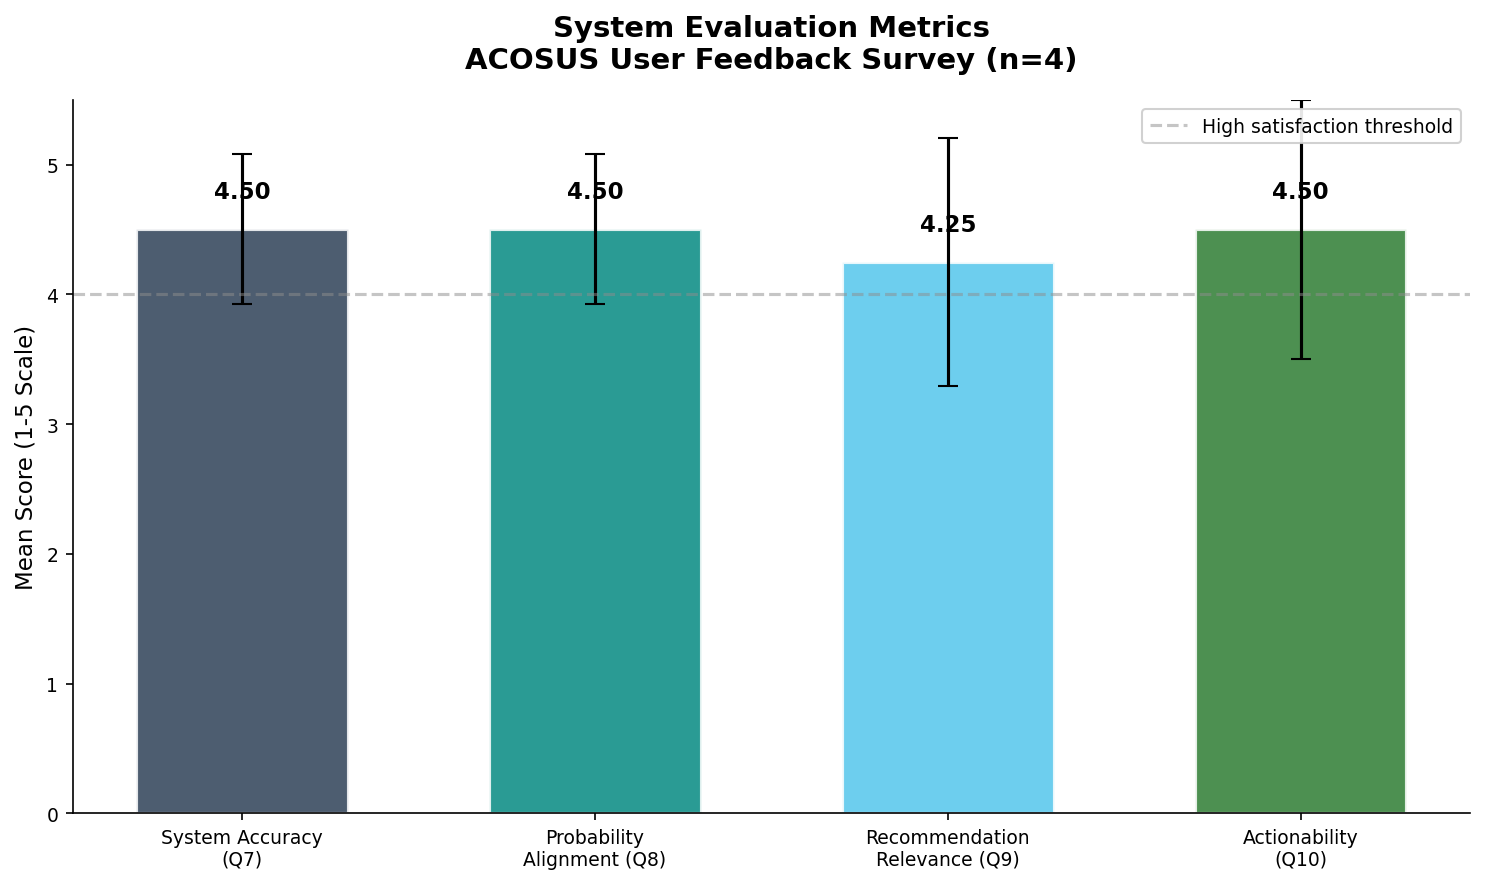

In [20]:
fig2, ax = plt.subplots(figsize=(10, 6))

eval_labels = ['System Accuracy\n(Q7)', 'Probability\nAlignment (Q8)',
               'Recommendation\nRelevance (Q9)', 'Actionability\n(Q10)']
eval_means = [df['Q7_num'].mean(), df['Q8_num'].mean(), df['Q9_num'].mean(), df['Q10_num'].mean()]
eval_stds = [df['Q7_num'].std(), df['Q8_num'].std(), df['Q9_num'].std(), df['Q10_num'].std()]

bar_colors = [COLORS['primary'], COLORS['secondary'], COLORS['accent'], COLORS['positive']]
bars = ax.bar(range(len(eval_labels)), eval_means, yerr=eval_stds,
              color=bar_colors, alpha=0.85, capsize=5, width=0.6, edgecolor='white', linewidth=1.5)

ax.set_xticks(range(len(eval_labels)))
ax.set_xticklabels(eval_labels)
ax.set_ylabel('Mean Score (1-5 Scale)')
ax.set_ylim(0, 5.5)
ax.axhline(y=4, color=COLORS['neutral'], linestyle='--', alpha=0.5, label='High satisfaction threshold')

# Add value labels on top of bars
for i, (bar, mean) in enumerate(zip(bars, eval_means)):
    ax.text(bar.get_x() + bar.get_width()/2, mean + 0.2, f'{mean:.2f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_title(f'System Evaluation Metrics\nACOSUS User Feedback Survey (n={len(df)})',
             fontsize=14, fontweight='bold', pad=15)
ax.legend(loc='upper right', framealpha=0.9)

plt.tight_layout()

if SAVE_FIGURES:
    plt.savefig(f'{OUTPUT_DIR}fig2_system_evaluation.png', dpi=300, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    print(f"💾 Saved: {OUTPUT_DIR}fig2_system_evaluation.png")

plt.show()

## Figure 3: Interface Assessment

💾 Saved: ./figures/fig3_interface_assessment.png


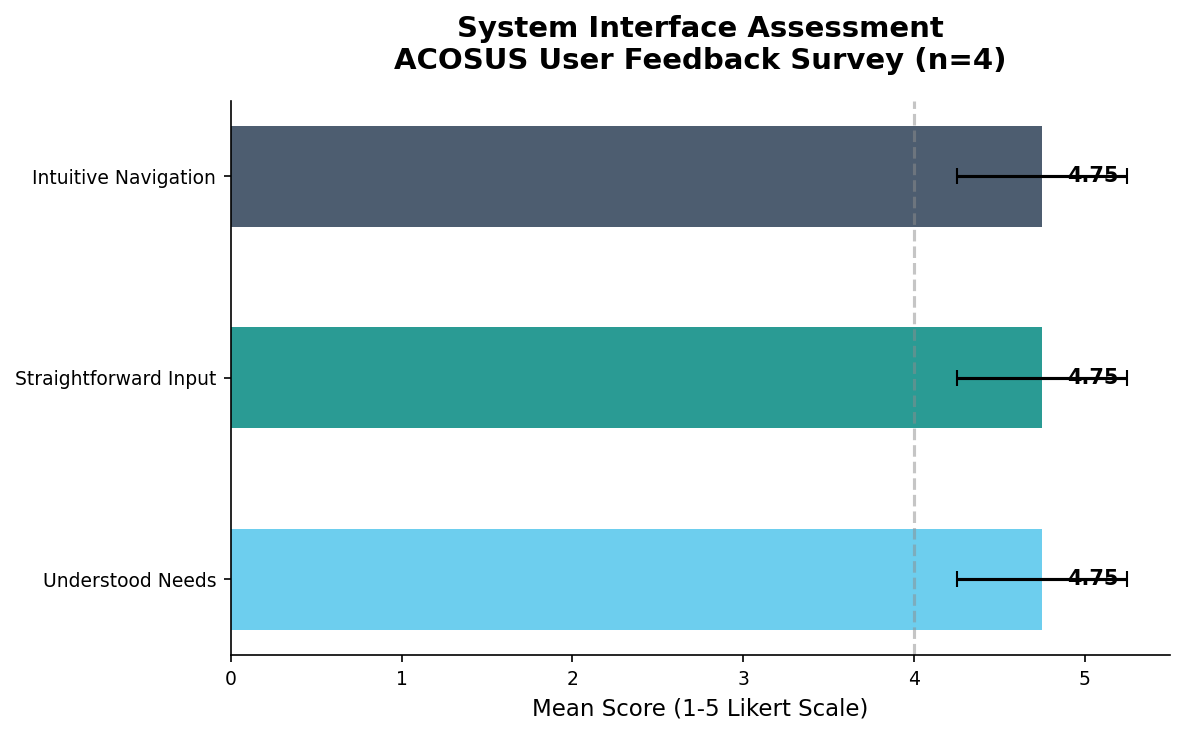

In [21]:
fig3, ax = plt.subplots(figsize=(8, 5))

interface_means = [df[col + '_num'].mean() for col in INTERFACE_COLS]
interface_stds = [df[col + '_num'].std() for col in INTERFACE_COLS]

bars = ax.barh(range(len(INTERFACE_LABELS)), interface_means, xerr=interface_stds,
               color=[COLORS['accent'], COLORS['secondary'], COLORS['primary']],
               alpha=0.85, capsize=4, height=0.5)

ax.set_yticks(range(len(INTERFACE_LABELS)))
ax.set_yticklabels(INTERFACE_LABELS)
ax.set_xlabel('Mean Score (1-5 Likert Scale)')
ax.set_xlim(0, 5.5)
ax.axvline(x=4, color=COLORS['neutral'], linestyle='--', alpha=0.5)

for i, mean in enumerate(interface_means):
    ax.text(mean + 0.15, i, f'{mean:.2f}', va='center', fontsize=10, fontweight='bold')

ax.set_title(f'System Interface Assessment\nACOSUS User Feedback Survey (n={len(df)})',
             fontsize=14, fontweight='bold', pad=15)

plt.tight_layout()

if SAVE_FIGURES:
    plt.savefig(f'{OUTPUT_DIR}fig3_interface_assessment.png', dpi=300, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    print(f"💾 Saved: {OUTPUT_DIR}fig3_interface_assessment.png")

plt.show()

## Figure 4: Behavioral Intention

💾 Saved: ./figures/fig4_behavioral_intention.png


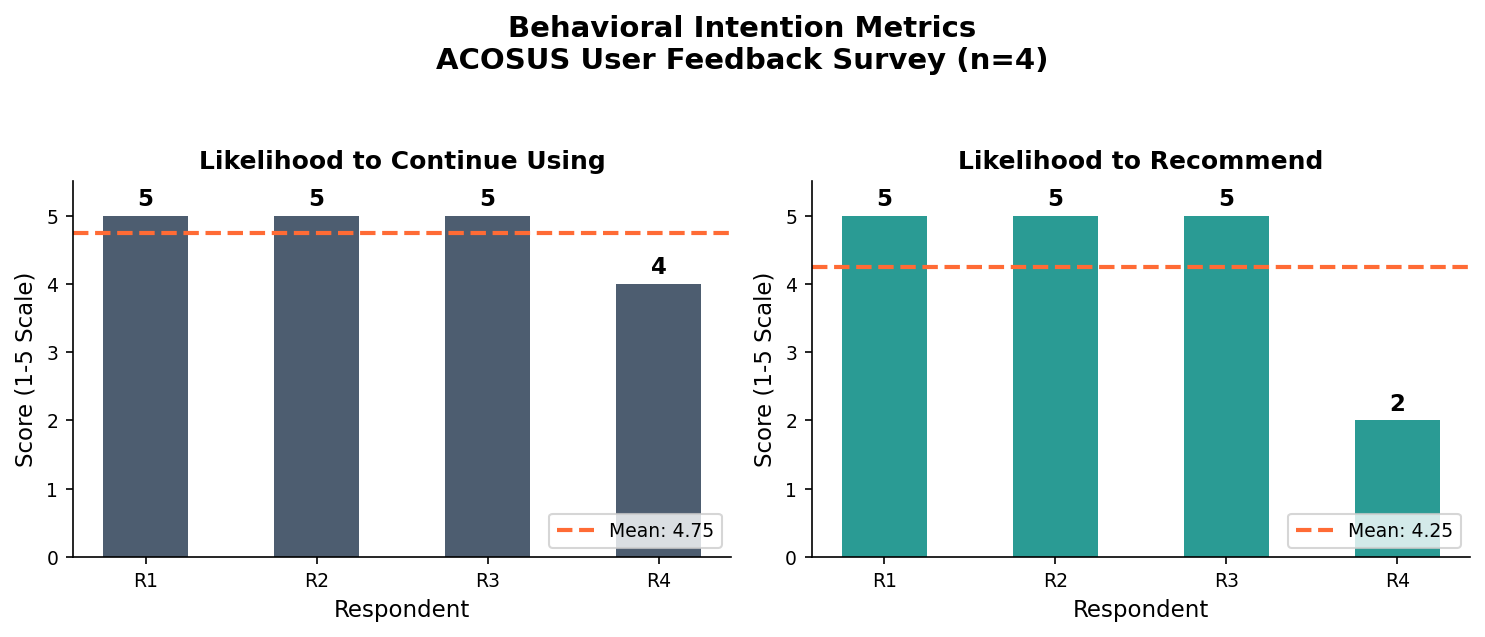

In [22]:
fig4, axes = plt.subplots(1, 2, figsize=(10, 4))

# Continue using
continue_scores = df['Q13_1_num'].dropna().values
recommend_scores = df['Q13_2_num'].dropna().values

ax1 = axes[0]
bars1 = ax1.bar(['R' + str(i+1) for i in range(len(continue_scores))],
                continue_scores, color=COLORS['primary'], alpha=0.85, width=0.5)
ax1.set_ylabel('Score (1-5 Scale)')
ax1.set_ylim(0, 5.5)
ax1.set_title('Likelihood to Continue Using', fontweight='bold')
ax1.axhline(y=continue_scores.mean(), color=COLORS['highlight'], linestyle='--',
            label=f'Mean: {continue_scores.mean():.2f}', linewidth=2)
ax1.legend(loc='lower right')
ax1.set_xlabel('Respondent')

for bar, score in zip(bars1, continue_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, score + 0.15, f'{int(score)}',
             ha='center', fontsize=11, fontweight='bold')

ax2 = axes[1]
bars2 = ax2.bar(['R' + str(i+1) for i in range(len(recommend_scores))],
                recommend_scores, color=COLORS['secondary'], alpha=0.85, width=0.5)
ax2.set_ylabel('Score (1-5 Scale)')
ax2.set_ylim(0, 5.5)
ax2.set_title('Likelihood to Recommend', fontweight='bold')
ax2.axhline(y=recommend_scores.mean(), color=COLORS['highlight'], linestyle='--',
            label=f'Mean: {recommend_scores.mean():.2f}', linewidth=2)
ax2.legend(loc='lower right')
ax2.set_xlabel('Respondent')

for bar, score in zip(bars2, recommend_scores):
    ax2.text(bar.get_x() + bar.get_width()/2, score + 0.15, f'{int(score)}',
             ha='center', fontsize=11, fontweight='bold')

plt.suptitle(f'Behavioral Intention Metrics\nACOSUS User Feedback Survey (n={len(df)})',
             fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()

if SAVE_FIGURES:
    plt.savefig(f'{OUTPUT_DIR}fig4_behavioral_intention.png', dpi=300, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    print(f"💾 Saved: {OUTPUT_DIR}fig4_behavioral_intention.png")

plt.show()

## Figure 5: Comprehensive Summary Dashboard

💾 Saved: ./figures/fig5_summary_dashboard.png


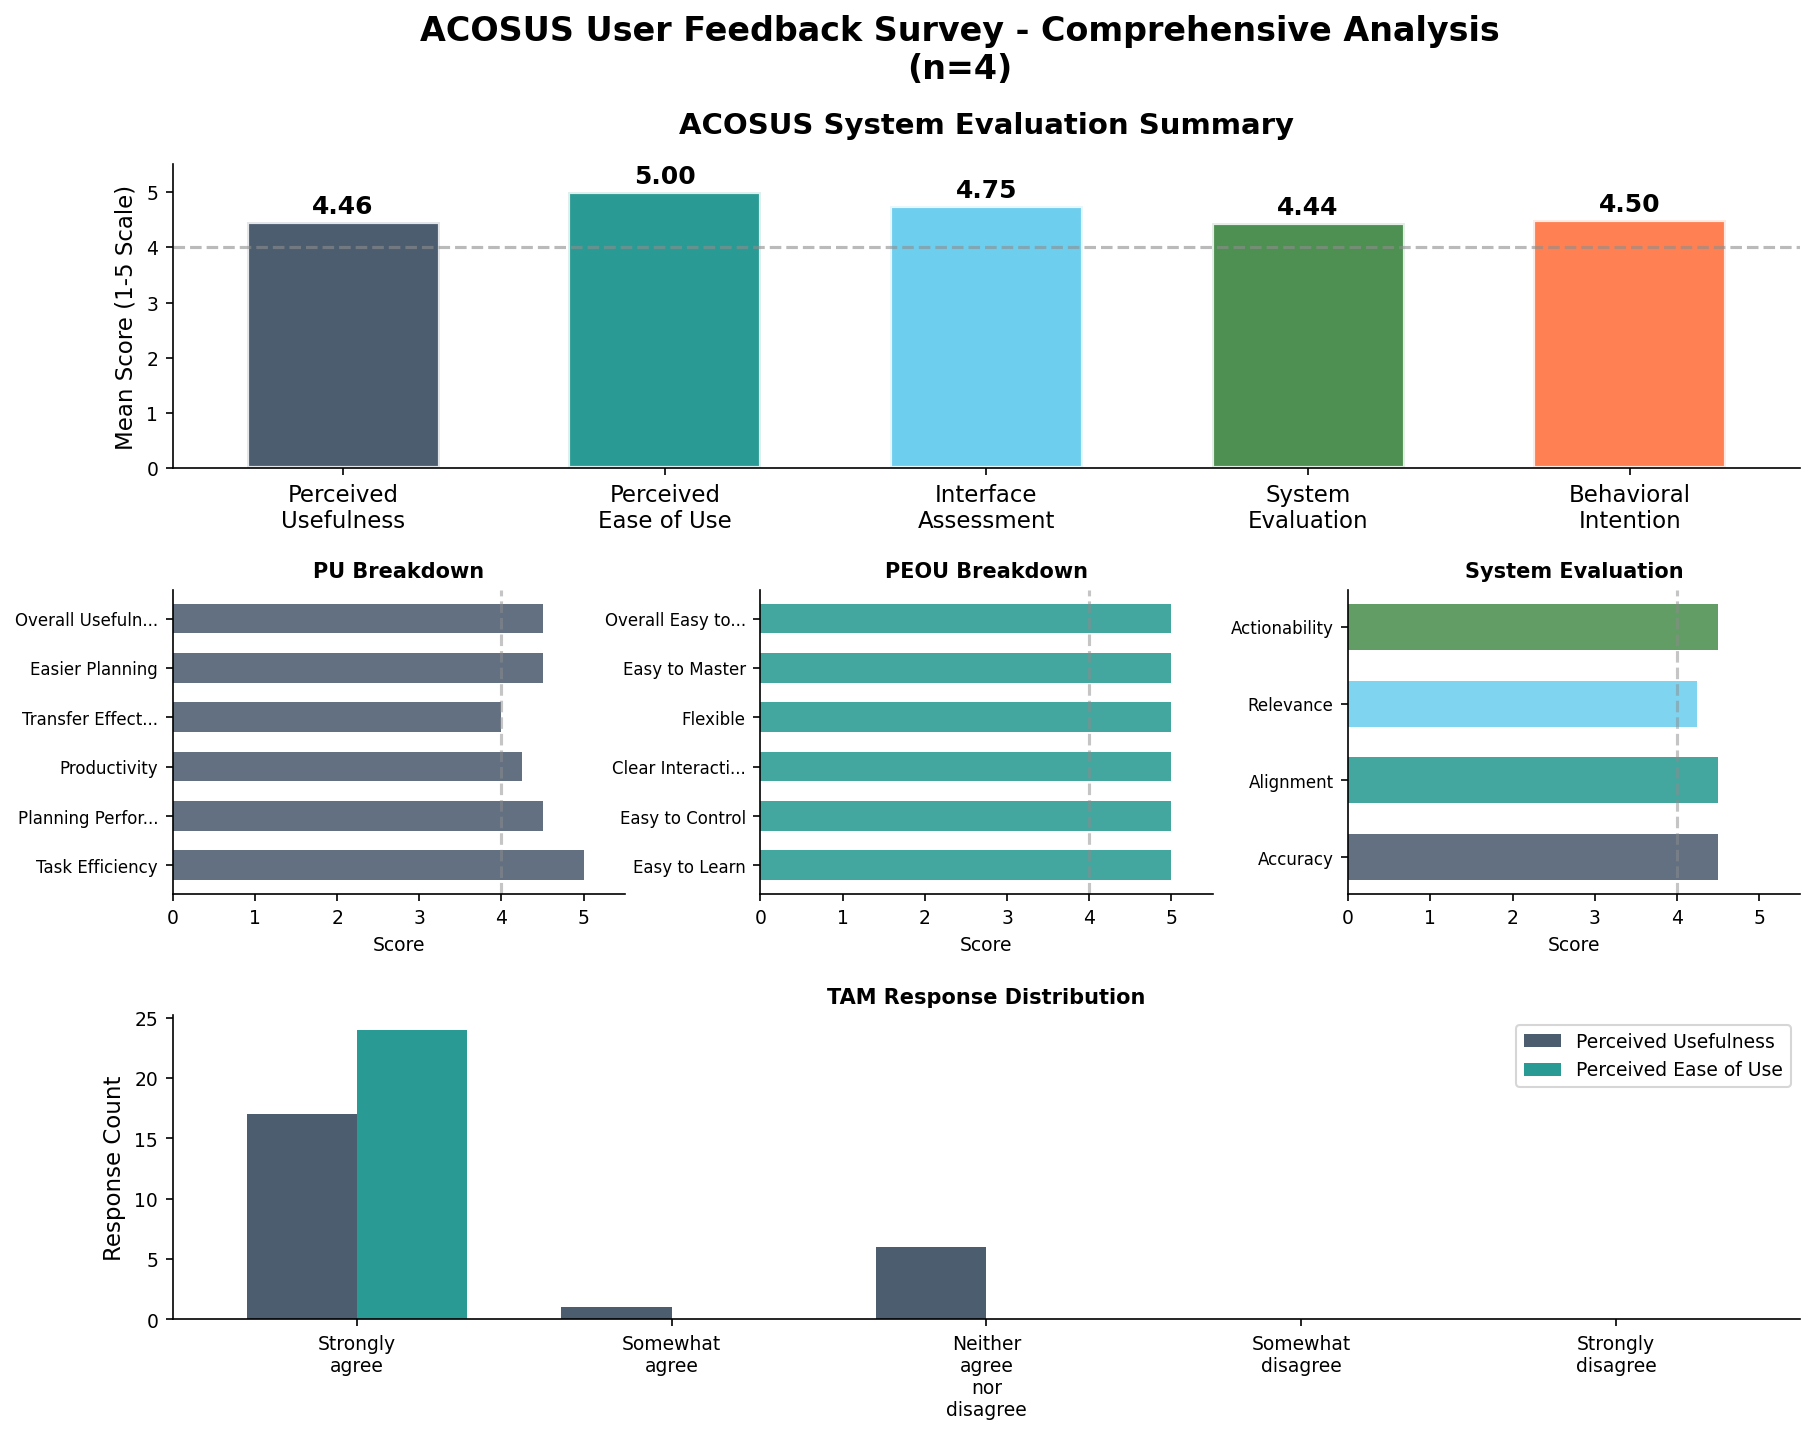

In [23]:
fig5 = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(3, 3, figure=fig5, hspace=0.4, wspace=0.3)

# Calculate summary statistics
pu_overall = np.mean([df[col + '_num'].mean() for col in PU_COLS])
peou_overall = np.mean([df[col + '_num'].mean() for col in PEOU_COLS])
interface_overall = np.mean([df[col + '_num'].mean() for col in INTERFACE_COLS])
eval_overall = np.mean([df['Q7_num'].mean(), df['Q8_num'].mean(),
                        df['Q9_num'].mean(), df['Q10_num'].mean()])
intention_overall = np.mean([df['Q13_1_num'].mean(), df['Q13_2_num'].mean()])

# Main summary metrics (top row spanning all columns)
ax_main = fig5.add_subplot(gs[0, :])
summary_labels = ['Perceived\nUsefulness', 'Perceived\nEase of Use', 'Interface\nAssessment',
                  'System\nEvaluation', 'Behavioral\nIntention']
summary_means = [pu_overall, peou_overall, interface_overall, eval_overall, intention_overall]
summary_colors = [COLORS['primary'], COLORS['secondary'], COLORS['accent'],
                  COLORS['positive'], COLORS['highlight']]

bars_main = ax_main.bar(range(len(summary_labels)), summary_means,
                         color=summary_colors, alpha=0.85, width=0.6,
                         edgecolor='white', linewidth=2)

ax_main.set_xticks(range(len(summary_labels)))
ax_main.set_xticklabels(summary_labels, fontsize=11)
ax_main.set_ylabel('Mean Score (1-5 Scale)', fontsize=11)
ax_main.set_ylim(0, 5.5)
ax_main.axhline(y=4, color=COLORS['neutral'], linestyle='--', alpha=0.6, linewidth=1.5)
ax_main.set_title('ACOSUS System Evaluation Summary', fontsize=14, fontweight='bold', pad=15)

for bar, mean in zip(bars_main, summary_means):
    ax_main.text(bar.get_x() + bar.get_width()/2, mean + 0.15, f'{mean:.2f}',
                 ha='center', fontsize=12, fontweight='bold')

# Detailed PU breakdown (bottom left)
ax_pu = fig5.add_subplot(gs[1, 0])
pu_means_plot = [df[col + '_num'].mean() for col in PU_COLS]
ax_pu.barh(range(len(PU_LABELS)), pu_means_plot, color=COLORS['primary'], alpha=0.75, height=0.6)
ax_pu.set_yticks(range(len(PU_LABELS)))
ax_pu.set_yticklabels([label[:15] + '...' if len(label) > 15 else label for label in PU_LABELS], fontsize=8)
ax_pu.set_xlim(0, 5.5)
ax_pu.set_xlabel('Score', fontsize=9)
ax_pu.set_title('PU Breakdown', fontweight='bold', fontsize=10)
ax_pu.axvline(x=4, color=COLORS['neutral'], linestyle='--', alpha=0.5)

# Detailed PEOU breakdown (bottom middle)
ax_peou = fig5.add_subplot(gs[1, 1])
peou_means_plot = [df[col + '_num'].mean() for col in PEOU_COLS]
ax_peou.barh(range(len(PEOU_LABELS)), peou_means_plot, color=COLORS['secondary'], alpha=0.75, height=0.6)
ax_peou.set_yticks(range(len(PEOU_LABELS)))
ax_peou.set_yticklabels([label[:15] + '...' if len(label) > 15 else label for label in PEOU_LABELS], fontsize=8)
ax_peou.set_xlim(0, 5.5)
ax_peou.set_xlabel('Score', fontsize=9)
ax_peou.set_title('PEOU Breakdown', fontweight='bold', fontsize=10)
ax_peou.axvline(x=4, color=COLORS['neutral'], linestyle='--', alpha=0.5)

# Evaluation metrics (bottom right)
ax_eval = fig5.add_subplot(gs[1, 2])
eval_labels_short = ['Accuracy', 'Alignment', 'Relevance', 'Actionability']
eval_means_plot = [df['Q7_num'].mean(), df['Q8_num'].mean(), df['Q9_num'].mean(), df['Q10_num'].mean()]
ax_eval.barh(range(len(eval_labels_short)), eval_means_plot,
             color=[COLORS['primary'], COLORS['secondary'], COLORS['accent'], COLORS['positive']],
             alpha=0.75, height=0.6)
ax_eval.set_yticks(range(len(eval_labels_short)))
ax_eval.set_yticklabels(eval_labels_short, fontsize=8)
ax_eval.set_xlim(0, 5.5)
ax_eval.set_xlabel('Score', fontsize=9)
ax_eval.set_title('System Evaluation', fontweight='bold', fontsize=10)
ax_eval.axvline(x=4, color=COLORS['neutral'], linestyle='--', alpha=0.5)

# Response distribution (bottom row)
ax_resp = fig5.add_subplot(gs[2, :])

response_order = ['Strongly agree', 'Somewhat agree', 'Neither agree nor disagree',
                  'Somewhat disagree', 'Strongly disagree']
pu_counts = {}
peou_counts = {}

for resp in response_order:
    pu_counts[resp] = sum([1 for col in PU_COLS for val in df[col] if val == resp])
    peou_counts[resp] = sum([1 for col in PEOU_COLS for val in df[col] if val == resp])

x_pos = np.arange(len(response_order))
width = 0.35

bars_pu = ax_resp.bar(x_pos - width/2, [pu_counts.get(r, 0) for r in response_order],
                       width, label='Perceived Usefulness', color=COLORS['primary'], alpha=0.85)
bars_peou = ax_resp.bar(x_pos + width/2, [peou_counts.get(r, 0) for r in response_order],
                         width, label='Perceived Ease of Use', color=COLORS['secondary'], alpha=0.85)

ax_resp.set_xticks(x_pos)
ax_resp.set_xticklabels([r.replace(' ', '\n') for r in response_order], fontsize=9)
ax_resp.set_ylabel('Response Count')
ax_resp.set_title('TAM Response Distribution', fontweight='bold', fontsize=10)
ax_resp.legend(loc='upper right')

plt.suptitle(f'ACOSUS User Feedback Survey - Comprehensive Analysis\n(n={len(df)})',
             fontsize=16, fontweight='bold', y=0.98)

if SAVE_FIGURES:
    plt.savefig(f'{OUTPUT_DIR}fig5_summary_dashboard.png', dpi=300, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    print(f"💾 Saved: {OUTPUT_DIR}fig5_summary_dashboard.png")

plt.show()

---
# 7. Export Summary Statistics

In [24]:
# Create comprehensive summary statistics table
summary_stats = {
    'Metric Category': [
        'Perceived Usefulness (PU)',
        'Perceived Ease of Use (PEOU)',
        'Interface Assessment',
        'System Accuracy',
        'Probability Alignment',
        'Recommendation Relevance',
        'Actionability',
        'Likelihood to Continue',
        'Likelihood to Recommend'
    ],
    'Mean': [
        pu_overall,
        peou_overall,
        interface_overall,
        df['Q7_num'].mean(),
        df['Q8_num'].mean(),
        df['Q9_num'].mean(),
        df['Q10_num'].mean(),
        df['Q13_1_num'].mean(),
        df['Q13_2_num'].mean()
    ],
    'Std Dev': [
        np.mean([df[col + '_num'].std() for col in PU_COLS]),
        np.mean([df[col + '_num'].std() for col in PEOU_COLS]),
        np.mean([df[col + '_num'].std() for col in INTERFACE_COLS]),
        df['Q7_num'].std(),
        df['Q8_num'].std(),
        df['Q9_num'].std(),
        df['Q10_num'].std(),
        df['Q13_1_num'].std(),
        df['Q13_2_num'].std()
    ],
    'Min': [
        min([df[col + '_num'].min() for col in PU_COLS]),
        min([df[col + '_num'].min() for col in PEOU_COLS]),
        min([df[col + '_num'].min() for col in INTERFACE_COLS]),
        df['Q7_num'].min(),
        df['Q8_num'].min(),
        df['Q9_num'].min(),
        df['Q10_num'].min(),
        df['Q13_1_num'].min(),
        df['Q13_2_num'].min()
    ],
    'Max': [
        max([df[col + '_num'].max() for col in PU_COLS]),
        max([df[col + '_num'].max() for col in PEOU_COLS]),
        max([df[col + '_num'].max() for col in INTERFACE_COLS]),
        df['Q7_num'].max(),
        df['Q8_num'].max(),
        df['Q9_num'].max(),
        df['Q10_num'].max(),
        df['Q13_1_num'].max(),
        df['Q13_2_num'].max()
    ],
    'N': [len(df)] * 9
}

stats_df = pd.DataFrame(summary_stats)

if SAVE_FIGURES:
    stats_df.to_csv(f'{OUTPUT_DIR}summary_statistics.csv', index=False)
    print(f"💾 Saved: {OUTPUT_DIR}summary_statistics.csv")

print("\n📊 Summary Statistics Table:")
stats_df.round(2)

💾 Saved: ./figures/summary_statistics.csv

📊 Summary Statistics Table:


,Metric Category,Mean,Std Dev,Min,Max,N
0,Perceived Usefulness (PU),4.46,0.85,3,5,4
1,Perceived Ease of Use (PEOU),5.00,0.00,5,5,4
2,Interface Assessment,4.75,0.50,4,5,4
3,System Accuracy,4.50,0.58,4,5,4
4,Probability Alignment,4.50,0.58,4,5,4
5,Recommendation Relevance,4.25,0.96,3,5,4
6,Actionability,4.50,1.00,3,5,4
7,Likelihood to Continue,4.75,0.50,4,5,4
8,Likelihood to Recommend,4.25,1.50,2,5,4


---
# 8. Final Summary Report

In [25]:
print("╔" + "═" * 68 + "╗")
print("║" + " ACOSUS SURVEY ANALYSIS - FINAL REPORT ".center(68) + "║")
print("╠" + "═" * 68 + "╣")
print(f"║  Total Responses: {len(df):<49}║")
print("╠" + "═" * 68 + "╣")
print("║" + " TAM METRICS ".center(68) + "║")
print("╟" + "─" * 68 + "╢")
print(f"║  Perceived Usefulness (PU):     {pu_overall:.2f}/5.00" + " " * 26 + "║")
print(f"║  Perceived Ease of Use (PEOU):  {peou_overall:.2f}/5.00" + " " * 26 + "║")
print("╠" + "═" * 68 + "╣")
print("║" + " SYSTEM EVALUATION ".center(68) + "║")
print("╟" + "─" * 68 + "╢")
print(f"║  System Accuracy:               {df['Q7_num'].mean():.2f}/5.00" + " " * 26 + "║")
print(f"║  Probability Alignment:         {df['Q8_num'].mean():.2f}/5.00" + " " * 26 + "║")
print(f"║  Recommendation Relevance:      {df['Q9_num'].mean():.2f}/5.00" + " " * 26 + "║")
print(f"║  Actionability:                 {df['Q10_num'].mean():.2f}/5.00" + " " * 26 + "║")
print("╠" + "═" * 68 + "╣")
print("║" + " BEHAVIORAL INTENTION ".center(68) + "║")
print("╟" + "─" * 68 + "╢")
print(f"║  Likelihood to Continue:        {df['Q13_1_num'].mean():.2f}/5.00" + " " * 26 + "║")
print(f"║  Likelihood to Recommend:       {df['Q13_2_num'].mean():.2f}/5.00" + " " * 26 + "║")
print("╚" + "═" * 68 + "╝")

╔════════════════════════════════════════════════════════════════════╗
║               ACOSUS SURVEY ANALYSIS - FINAL REPORT                ║
╠════════════════════════════════════════════════════════════════════╣
║  Total Responses: 4                                                ║
╠════════════════════════════════════════════════════════════════════╣
║                            TAM METRICS                             ║
╟────────────────────────────────────────────────────────────────────╢
║  Perceived Usefulness (PU):     4.46/5.00                          ║
║  Perceived Ease of Use (PEOU):  5.00/5.00                          ║
╠════════════════════════════════════════════════════════════════════╣
║                         SYSTEM EVALUATION                          ║
╟────────────────────────────────────────────────────────────────────╢
║  System Accuracy:               4.50/5.00                          ║
║  Probability Alignment:         4.50/5.00                          ║
║  Rec

---
# 9. Qualitative Response Analysis

In [26]:
# Open-ended question columns
qualitative_cols = {
    'Q4': 'Interface difficulties',
    'Q6': 'Technical issues faced',
    'Q11': 'Most helpful feature',
    'Q12': 'Missing features',
    'Q17': 'Additional features requested',
    'Q19': 'Redesign suggestions',
    'Q20': 'Additional feedback'
}

print("📝 QUALITATIVE RESPONSES")
print("═" * 70)

for col, description in qualitative_cols.items():
    if col in df.columns:
        responses = df[col].dropna()
        responses = responses[responses.astype(str).str.strip() != '']
        if len(responses) > 0:
            print(f"\n🔹 {description} ({col}):")
            print("-" * 50)
            for i, resp in enumerate(responses, 1):
                print(f"   {i}. {resp}")

📝 QUALITATIVE RESPONSES
══════════════════════════════════════════════════════════════════════

🔹 Interface difficulties (Q4):
--------------------------------------------------
   1. None, everything was clear.
   2. nothing really, everything was easy to navigate and understand fully. 

🔹 Most helpful feature (Q11):
--------------------------------------------------
   1. its faster and more compatible.
   2. the ui navigation is very user friendly.
   3. the user interface was easy to understand and navigate. 

🔹 Missing features (Q12):
--------------------------------------------------
   1. no feature was missing, my experience was great. 

🔹 Additional features requested (Q17):
--------------------------------------------------
   1. GUI
   2. I feel as though it is not lacking in any area. 

🔹 Redesign suggestions (Q19):
--------------------------------------------------
   1. Linux-based System.
   2. None. It works perfectly.
   3. probably make it tailored more towards indivi

---
# 10. Download Files (Colab)

In [27]:
# Download generated files (only works in Google Colab)
if SAVE_FIGURES:
    try:
        from google.colab import files
        import glob

        print("📥 Downloading generated files...")
        for filepath in glob.glob(f'{OUTPUT_DIR}*'):
            files.download(filepath)
            print(f"   ✓ {filepath}")
    except ImportError:
        print(f"📁 Files saved to: {OUTPUT_DIR}")
        print("   (Download manually if not using Google Colab)")

📥 Downloading generated files...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✓ ./figures/fig1_tam_metrics.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✓ ./figures/summary_statistics.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✓ ./figures/fig4_behavioral_intention.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✓ ./figures/fig3_interface_assessment.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✓ ./figures/fig5_summary_dashboard.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✓ ./figures/fig2_system_evaluation.png
